### Hough Transformation

The Hough Transform is a technique used in computer vision and image processing to detect shapes, particularly lines and circles, within an image. It was initially developed to identify patterns in binary images, but it has since been extended to work with grayscale images as well.

The Hough Transform is particularly useful for detecting lines in an image, and it is commonly employed in applications such as edge detection, object recognition, and image analysis.

#### Working

1. Line Detection:

Representation of a Line:
The Hough Transform represents a line in a polar coordinate system instead of the Cartesian coordinate system (x, y). In polar coordinates, a line can be represented by two parameters: the angle (θ) and the distance (r) from the origin to the closest point on the line. The equation of a line in polar coordinates is given by:

r=x⋅cos(θ)+y⋅sin(θ)

Accumulator Space:
The Hough Transform uses an accumulator space to keep track of the number of votes for different combinations of θ and r. Each point in the original image casts votes in the accumulator space for potential lines that pass through it. The accumulator space is a 2D array where each cell represents a particular line (θ, r).

Finding Peaks:
After the accumulation process, peaks in the accumulator space correspond to the parameters (θ, r) of the lines present in the image. These peaks indicate the most likely parameters for lines. The number of votes at each peak can be used as a measure of the line's significance.

Thresholding:
To reduce false positives, a threshold is often applied to the accumulator space, only considering peaks with a sufficient number of votes.

2. Circle Detection:

The Hough Circle Transform is an extension for detecting circles in an image.

Circle Representation:
A circle in Cartesian coordinates is represented by three parameters: the coordinates of the center (h, k) and the radius (r). The Hough Circle Transform uses a 3D accumulator space with each cell representing a potential circle (h, k, r).

Voting and Accumulation:
Similar to the Hough Line Transform, each edge point in the image casts votes in the accumulator space for potential circles that pass through it.

Finding Circles:
After the accumulation process, peaks in the accumulator space correspond to potential circles. The peaks indicate the most likely parameters for circles.

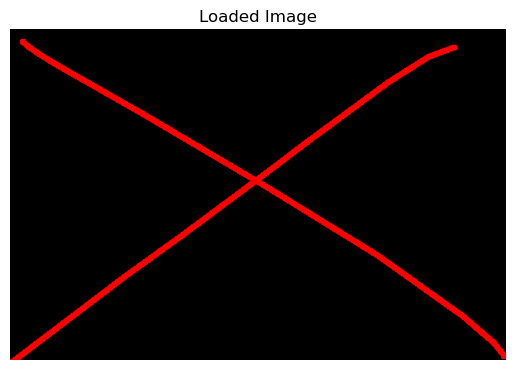

In [1]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = '/home/pratyush/Downloads/hough.png'  
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image from {image_path}")
else:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Loaded Image')
    plt.axis('off')  # Turn off axis labels
    plt.show()

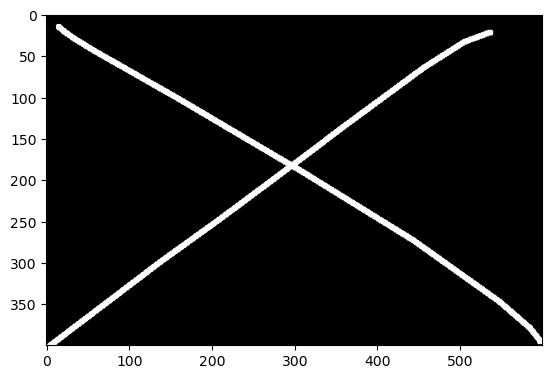

In [2]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/home/pratyush/Downloads/hough.png', 0) #Fails if uses as-is due to bright background.
#Also try lines2 to see how it only picks up straight lines
#Invert images to show black background
# image = ~image  #Invert the image (only if it had bright background that can confuse hough)
plt.imshow(image, cmap='gray')

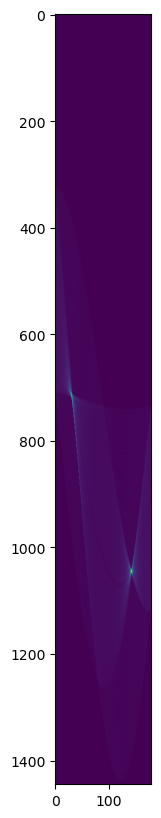

In [3]:
# Set a precision of 1 degree. (Divide into 180 data points)
# You can increase the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace)  

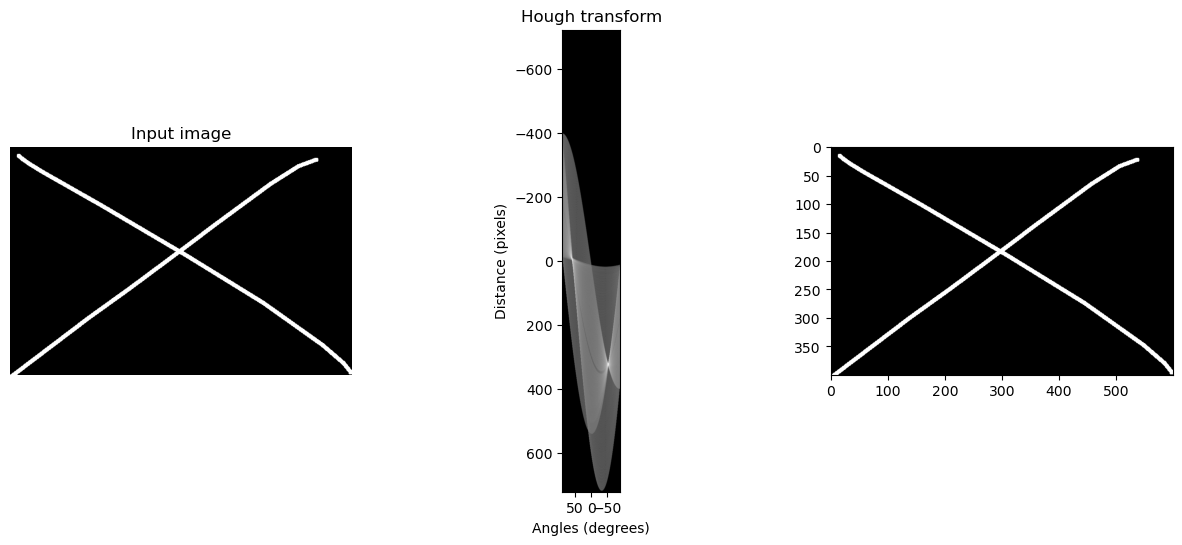

In [4]:
#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)

angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

In [5]:
origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

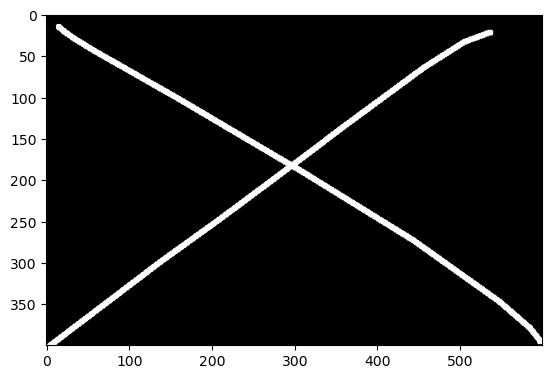

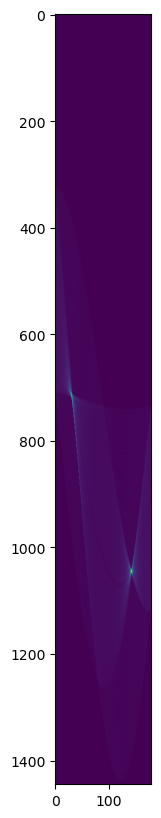

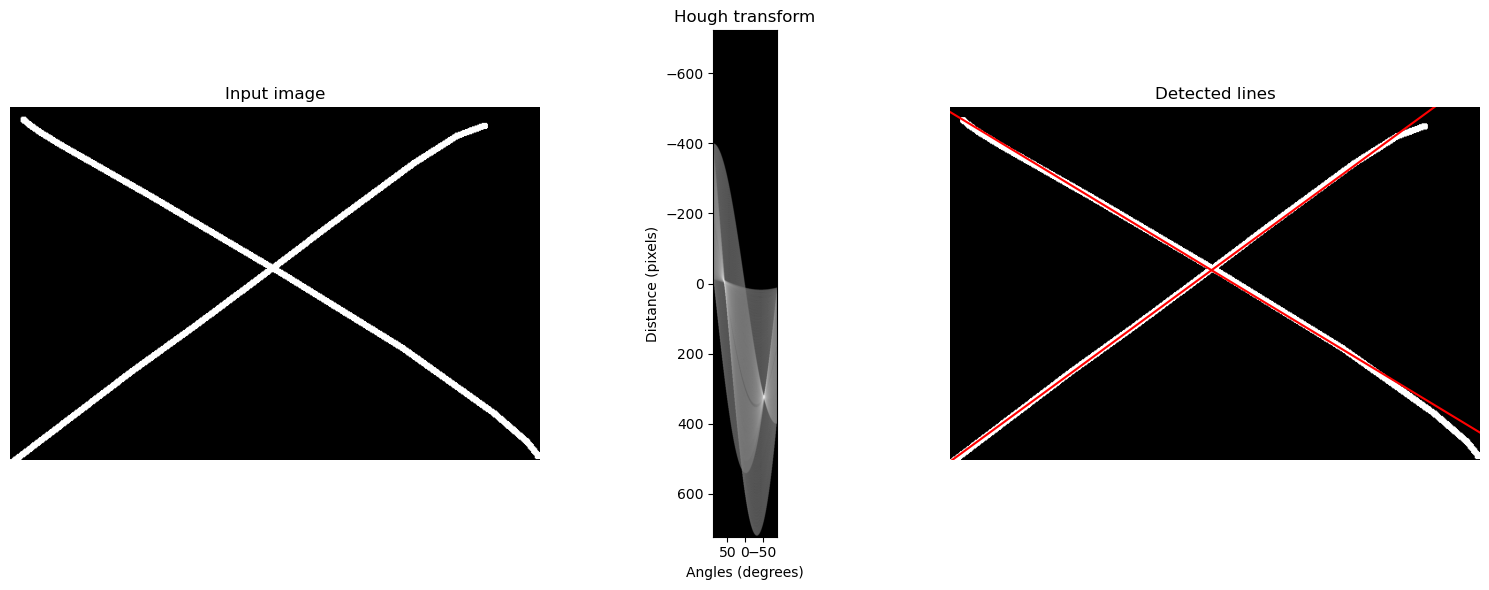

67.37430167597765


In [6]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/home/pratyush/Downloads/hough.png', 0) #Fails if uses as-is due to bright background.
#Also try lines2 to see how it only picks up straight lines
#Invert images to show black background
# image = ~image  #Invert the image (only if it had bright background that can confuse hough)
plt.imshow(image, cmap='gray')

# Set a precision of 1 degree. (Divide into 180 data points)
# You can increase the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace)  


#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)


#################################################################
#Example code from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

###############################################################
# Convert angles from radians to degrees (1 rad = 180/pi degrees)
angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines

### Standard Hough Line Transform

The Standard Hough Line Transform is a technique used in computer vision and image processing to detect straight lines in an image. It is particularly useful for identifying lines, regardless of their orientation or length. The Standard Hough Line Transform is also known as the classical or traditional Hough Transform.

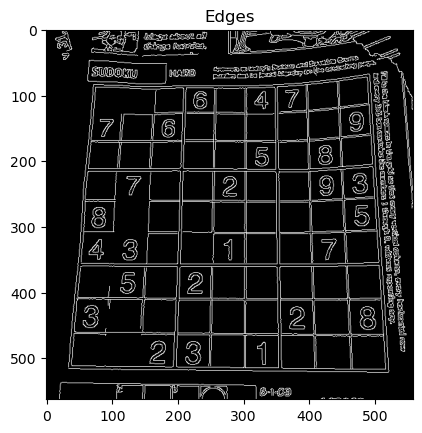

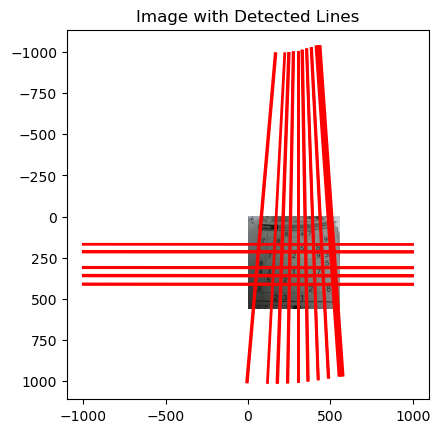

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread (0x605f310).
Cannot move to target thread (0x40feb30)

QObject::moveToThread: Current thread (0x40feb30) is not the object's thread

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/home/pratyush/Downloads/sudokubig.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Plot the edges using Matplotlib
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.show()

# Perform Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Plot the image with detected lines using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)

plt.title('Image with Detected Lines')
plt.show()

# Convert the image to RGB before using cv2.imshow
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the final image with detected lines using cv2.imshow
cv2.imshow('Image with Detected Lines', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Parameters accepted by HoughLines() function

image:
The input binary image or edge-detected image on which the Hough Line Transform will be applied. It is generally the output of an edge detection algorithm like Canny.

rho:
Resolution of the accumulator in pixels. It represents the distance resolution of the accumulator in pixels. Common values include 1 or 2 pixels.

theta:
Angle resolution of the accumulator in radians. It represents the angular resolution of the accumulator, and common values are in radians, e.g., np.pi/180 for 1-degree resolution.

threshold:
The accumulator threshold parameter. Only those lines are returned that get enough votes (≥ threshold).

lines (optional):
Output vector to store the detected lines. Each line is represented by a two-element vector (ρ,θ). If not provided, the function returns only the vector of (ρ,θ) for each detected line.

srn (optional):
For multi-scale Hough Transform, this parameter represents the divisor for the distance resolution rho. By default, srn=0, which means a single-scale Hough Transform.

stn (optional):
For multi-scale Hough Transform, this parameter represents the divisor for the angle resolution theta. By default, stn=0, which means a single-scale Hough Transform.

min_theta (optional):
The minimum angle to check for lines. The default value is 0 radians.

max_theta (optional):
The maximum angle to check for lines. The default value is π radians.

### Probablistic Hough Line Transform

The Probabilistic Hough Line Transform is an extension of the Standard Hough Line Transform used for detecting straight lines in images. Unlike the standard version, the probabilistic variant is more efficient and provides line segments rather than the complete lines. This can be particularly useful in scenarios where you are interested in the approximate boundaries of straight segments rather than the entire lines.


Parameters Accepted by cv2.HoughLinesP:

image: The input binary image or edge-detected image.

rho: Resolution of the accumulator in pixels.

theta: Angle resolution of the accumulator in radians.

threshold: The accumulator threshold parameter.

minLineLength: Minimum length of the line. Lines shorter than this are rejected.

maxLineGap: Maximum allowed gap between line segments to treat them as a single line.

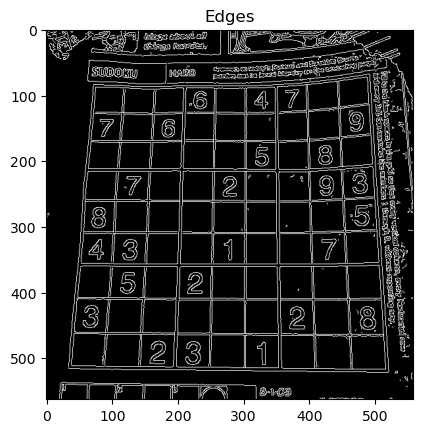

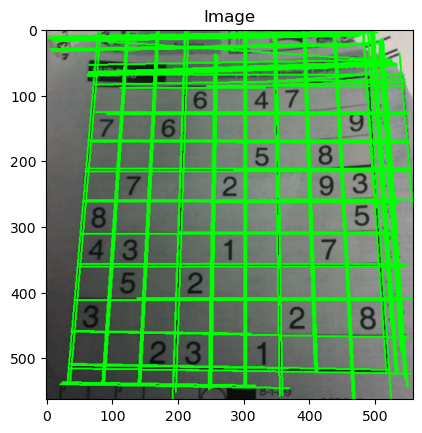

In [8]:
import cv2
import numpy as np
img = cv2.imread('/home/pratyush/Downloads/sudokubig.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,30,50,apertureSize = 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.show()

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=200,maxLineGap=90)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

# cv2.imshow('image', img)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.show()


(720, 1280, 3)


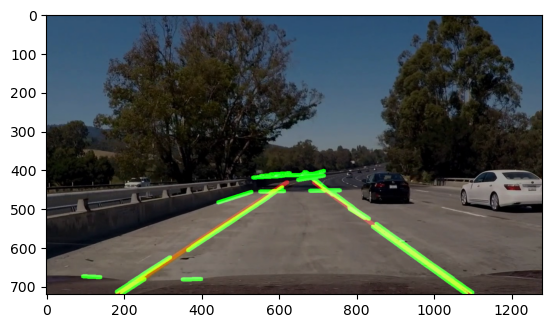

In [9]:
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image = cv2.imread('/home/pratyush/Downloads/lane4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=130,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=15)
image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

### Hough circle Transform

The Hough Circle Transform is a technique used in computer vision and image processing to detect circles in an image. It is an extension of the Hough Line Transform and is particularly useful when searching for circular shapes.

Parameters accepted by HoughCircles():

image: The input grayscale image.

method: The method used for detecting circles. For the Hough Circle Transform, use cv2.HOUGH_GRADIENT.

dp: Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1, the accumulator has the same resolution as the input image.

minDist: Minimum distance between the centers of detected circles. This parameter helps eliminate duplicates.

param1: Gradient value used in the edge detection (typically set to a higher value).

param2: Accumulator threshold for circle detection. The higher the threshold, the fewer circles will be detected.

minRadius: Minimum radius of the detected circles.

maxRadius: Maximum radius of the detected circles.

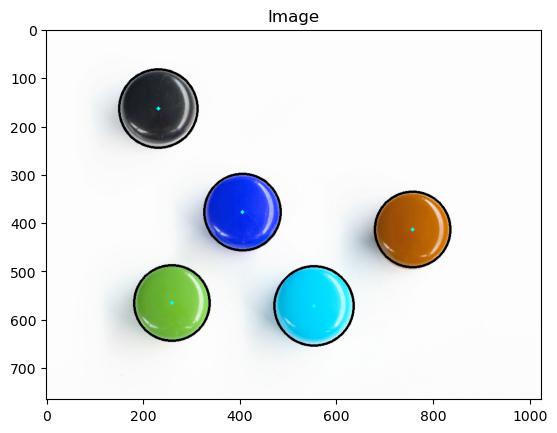

In [16]:
import numpy as np
import cv2 as cv
img = cv.imread('/home/pratyush/Downloads/smarties.png')
output = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 20,
                          param1=90, param2=70, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
for (x, y ,r) in detected_circles[0, :]:
    cv.circle(output, (x, y), r, (0, 0, 0), 3)
    cv.circle(output, (x, y), 2, (0, 255, 255), 3)


plt.imshow(output, cmap='gray')
plt.title('Image')
plt.show()

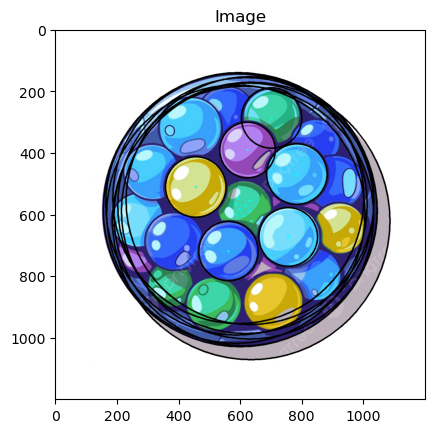

In [35]:
import numpy as np
import cv2 as cv
img = cv.imread('/home/pratyush/Downloads/smarties2.jpg')
output = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 20,
                          param1=200, param2=150, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))
for (x, y ,r) in detected_circles[0, :]:
    cv.circle(output, (x, y), r, (0, 0, 0), 3)
    cv.circle(output, (x, y), 2, (0, 255, 255), 3)


plt.imshow(output, cmap='gray')
plt.title('Image')
plt.show()

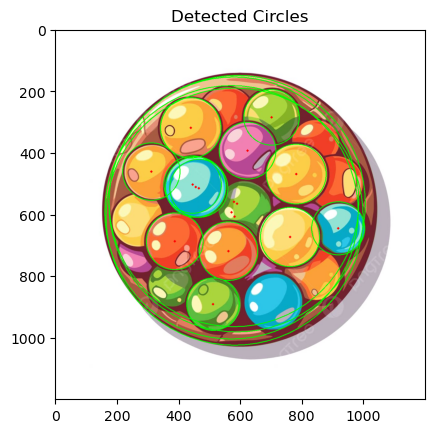

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image and convert it to grayscale
img = cv.imread('/home/pratyush/Downloads/smarties2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to the grayscale image
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Use HoughCircles to detect circles
circles = cv2.HoughCircles(
    blur, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=150, param2=130, minRadius=0, maxRadius=420
)

# If circles are found, draw them on the image
if circles is not None:
    circles = np.uint16(np.around(circles))
    
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
        # Draw the center of the circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles')
plt.show()
